### Feature Engineering - Feature Creation

In [11]:
import pandas as pd
import string

data=pd.read_csv("SMSSpamCollection.tsv",sep='\t')
data.columns=['label','body_text']

Feature for text message length

In [12]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data.head()

# .apply() method in pandas is used to apply a function along an axis of the DataFrame. It can be applied to each row or column of the DataFrame, depending on the axis specified.

# data['body_text'] selects the column named 'body_text' from the DataFrame data & apply() is called on this column.

# Inside .apply(), a lambda function is defined: lambda x: len(x) - x.count(" "). This function calculates the length of the text in each row (len(x)) and subtracts the count of spaces in that text (x.count(" ")).

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


In [13]:
def count_punct(text):
    count = sum([1 for punct in text if punct in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


### Evaluating the created features

In [19]:
from matplotlib import  pyplot
import numpy as np
%matplotlib inline

In [29]:
np.linspace(0,200,40)

# np.linspace(0, 200, 40) is a NumPy function call that generates an array of 40 evenly spaced numbers between 0 and 200 (inclusive of both endpoints).

array([  0.        ,   5.12820513,  10.25641026,  15.38461538,
        20.51282051,  25.64102564,  30.76923077,  35.8974359 ,
        41.02564103,  46.15384615,  51.28205128,  56.41025641,
        61.53846154,  66.66666667,  71.79487179,  76.92307692,
        82.05128205,  87.17948718,  92.30769231,  97.43589744,
       102.56410256, 107.69230769, 112.82051282, 117.94871795,
       123.07692308, 128.20512821, 133.33333333, 138.46153846,
       143.58974359, 148.71794872, 153.84615385, 158.97435897,
       164.1025641 , 169.23076923, 174.35897436, 179.48717949,
       184.61538462, 189.74358974, 194.87179487, 200.        ])

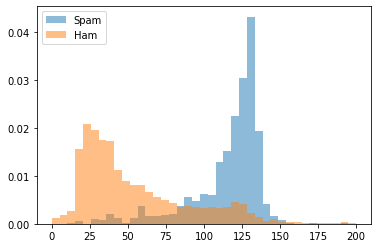

In [25]:
# Evaluate the spam and ham message length new feature

bins=np.linspace(0,200,40)
pyplot.hist(data[data['label']=='spam']['body_len'], bins=bins,alpha=0.5,density=True,label='Spam')
pyplot.hist(data[data['label']=='ham']['body_len'], bins=bins,alpha=0.5,density=True,label='Ham')
pyplot.legend(loc='upper left')
pyplot.show()

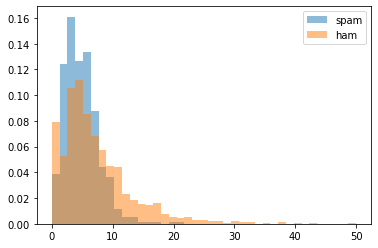

In [27]:
# Evaluating Punctuation percentage in text feature

bins = np.linspace(0, 50, 40)

pyplot.hist(data[data['label'] == 'spam']['punct%'], bins=bins, alpha=0.5, density=True, label='spam')
pyplot.hist(data[data['label'] == 'ham']['punct%'], bins=bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

Based on the evaluation, the first hypothesis (that spam tends to be longer than ham) is correct, so it can provide value to the ML model to be created. On the contrary, the second hypothesis (that there is less punctuation in ham compared to spam) is not that accurate; thus, it's not clear if this would provide value to the model. However, we can still leave this second feature in the model to see what value can the model really extract from this feature.

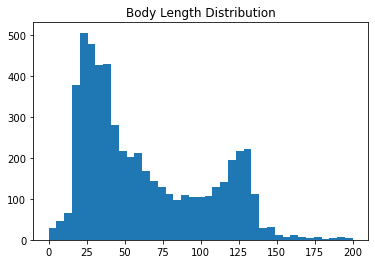

In [30]:
# checking the distribution of body length

bins = np.linspace(0, 200, 40)

pyplot.hist(data['body_len'], bins=bins)
pyplot.title('Body Length Distribution')
pyplot.show()

Insigths from the plot: the ones on the right are spam (longer messages) while the one on the left are ham or real text (shorter messages).

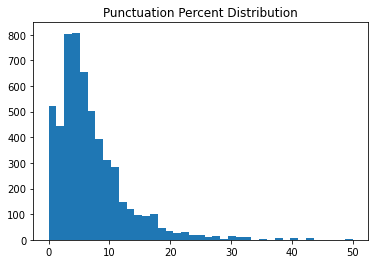

In [31]:
# checking the distribution of punctuation percent

bins = np.linspace(0, 50, 40)

pyplot.hist(data['punct%'], bins=bins)
pyplot.title('Punctuation Percent Distribution')
pyplot.show()

Insights from the plot: This feature is a good candidate for distribution since it's skewed to the left and there are a lot of outliers (which can make the model biased as the model might dig too much on the right tail).

### Transform the punctuation % feature

### Box-Cox Power Transformation

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |


**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

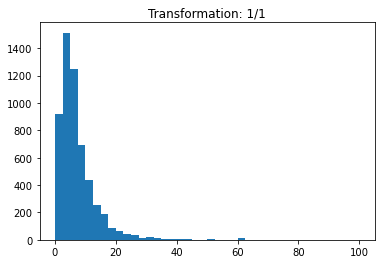

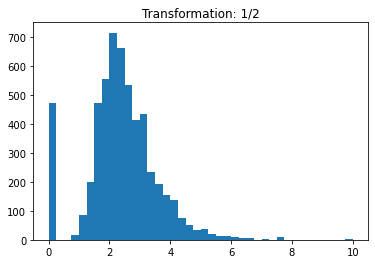

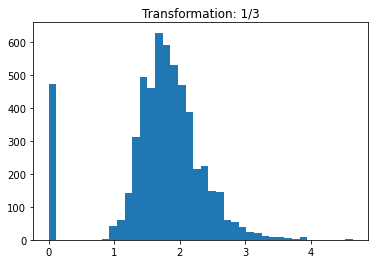

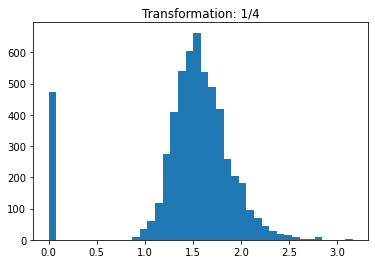

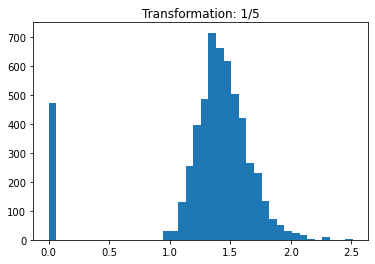

In [32]:
# Idea: do a bunch of power transformations and pick the histogram that loks the most like a normal distribution
# Transformation 1: No transformation (y^(1/1) or just y)
# Transformation 2: Square root transformation (y^(1/2))
# Transformation 3: y^(1/3)
# Transformation 4: y^(1/4)
# Transformation 5: y^(1/5)

for i in [1, 2, 3, 4, 5]:
    pyplot.hist((data['punct%'])**(1/i), bins=40) # setting the bins to 40 but not specifying the cut points since the scale would change depending on the transformation
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()

Insights from the plots: Transformation 4 or 5 looks good since they're closer to a normal distribution. Also, it is noticeable that as the transformation goes on, the outliers are being pulled to the center of the distribution. One thing to note: the stack on the left of the plots are just zeroes meaning there's no punctuation (any power transformation of zero is still zero).